# CNN Model Example (using MNIST Dataset)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Input, Reshape, Flatten

In [6]:
in_layer = Input(shape=(28, 28))
reshaped = Reshape(target_shape=(28, 28, 1))(in_layer)
conv = Conv2D(filters=60, kernel_size=3)(reshaped)
pooling = MaxPooling2D()(conv) 
conv = Conv2D(filters=60, kernel_size=3)(pooling)
pooling = MaxPooling2D()(conv) 
conv = Conv2D(filters=60, kernel_size=3)(pooling)
pooling = MaxPooling2D()(conv) 
flat = Flatten()(pooling)
d1 = Dense(units=400, activation="tanh")(flat)
d2 = Dense(units=100, activation="tanh")(d1)
out_layer = Dense(units=10, activation="softmax")(d2)

In [7]:
model = Model(in_layer, out_layer)

In [8]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
model.fit(x_train, to_categorical(y_train, num_classes=10), batch_size=1000, epochs=10)

Epoch 1/10
60/60 [==============================] - 31s 518ms/step - loss: 0.7214 - accuracy: 0.7882
Epoch 2/10
60/60 [==============================] - 28s 475ms/step - loss: 0.1864 - accuracy: 0.9459
Epoch 3/10
60/60 [==============================] - 31s 512ms/step - loss: 0.1281 - accuracy: 0.9626
Epoch 4/10
60/60 [==============================] - 31s 515ms/step - loss: 0.1035 - accuracy: 0.9695
Epoch 5/10
60/60 [==============================] - 29s 486ms/step - loss: 0.0900 - accuracy: 0.9725
Epoch 6/10
60/60 [==============================] - 32s 532ms/step - loss: 0.0761 - accuracy: 0.9776
Epoch 7/10
60/60 [==============================] - 29s 487ms/step - loss: 0.0645 - accuracy: 0.9808
Epoch 8/10
60/60 [==============================] - 31s 521ms/step - loss: 0.0592 - accuracy: 0.9822
Epoch 9/10
60/60 [==============================] - 27s 444ms/step - loss: 0.0504 - accuracy: 0.9851
Epoch 10/10
60/60 [==============================] - 30s 499ms/step - loss: 0.0437 - accura

In [10]:
model.evaluate(x_test, to_categorical(y_test, num_classes=10))

313/313 [==============================] - 2s 5ms/step - loss: 0.0622 - accuracy: 0.9803


[0.06216618791222572, 0.9803000092506409]

In [11]:
model.layers

In [12]:
model2 = Model(model.input, model.layers[2].output)

In [13]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 60)        600       
Total params: 600
Trainable params: 600
Non-trainable params: 0
_________________________________________________________________


In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
output = model2.predict(x_train[:1])

In [18]:
output.shape

(1, 26, 26, 60)

In [19]:
imgs = output[0]

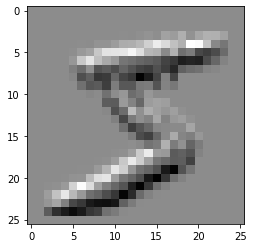

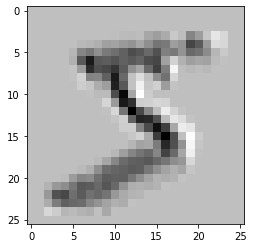

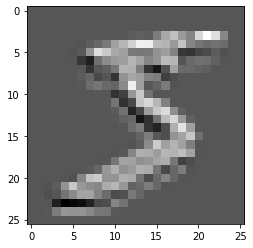

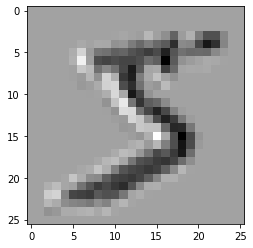

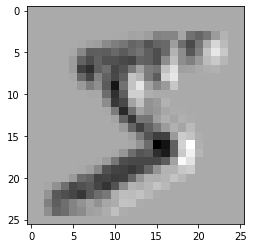

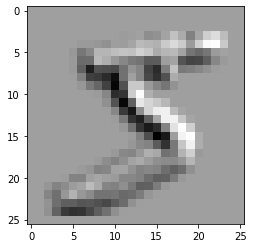

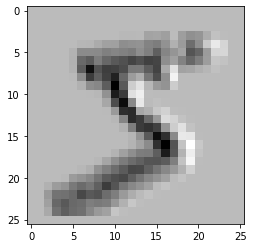

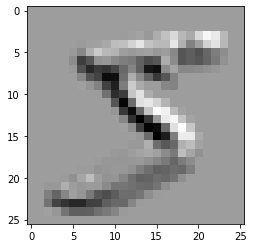

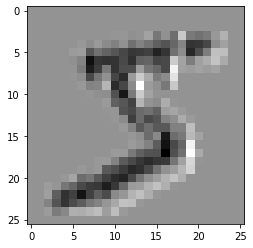

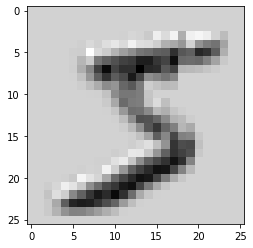

In [21]:
for i in range(10):
    plt.figure()
    plt.imshow(imgs[:, :, i], cmap='gray')
    plt.show()